# To build a multiple linear regression model for the prediction of demand for shared bikes

- Main steps in MLR for this analysis
    1. Reading, Understanding, Visualization
    2. Data preparation for model 
        1. Encoding
        2. test_train_split
        3. Rescaling of data, if necessary
    3. Training the model
        1. Feature Selection with RFE
        1. Minimize model (if necessary)
    4. Residual Analysis
    5. Prediction 
    6. Evalution on the test-set
    7. Model Evaluation Observation

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading, Understanding, Visualization

## 1. 1. Reading the data

In [3]:
# Chardet: The Universal Character Encoding Detector (ASCII, UTF-8, UTF-16, UTF-32,Big5, GB2312, EUC-TW, HZ-GB-2312 etc)
import chardet

In [4]:
# Checking the encoding of day file
with open("day.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


###### To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.

In [5]:
bikesharing_df = pd.read_csv("day.csv", encoding='palmos', parse_dates=['dteday'])

# Way to display & see the column names
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1. 2. 1. Understatnding the data

In [6]:
# To check total rows and columns of the dataset
bikesharing_df.shape

(730, 16)

In [7]:
# Checking the types of the variables in the dataset  and total memory usage of the dataframe variable
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# Checking data values present in each columns
bikesharing_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
112,113,2018-04-23,2,0,4,0,6,0,2,18.860000,22.50605,88.7917,15.458575,1462,2574,4036
158,159,2018-08-06,2,0,6,0,3,1,1,31.809153,36.36395,62.2083,9.166739,676,3725,4401
124,125,2018-05-05,2,0,5,0,4,1,1,18.825847,22.09585,44.4167,19.791264,614,3819,4433
203,204,2018-07-23,3,0,7,0,6,0,1,34.815847,40.21435,50.0000,8.791807,987,2298,3285
255,256,2018-09-13,3,0,9,0,2,1,1,26.684153,30.17770,71.2500,9.500868,701,4062,4763


###### Insights:
- Dataset has 730 rows and 16 columns.
- Except one column (dteday) which is date type, all others are either float or integer type.
- There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.
- We will have to analyze and decide whether to convert them to categorical or treat as integer.
- Using Readme.txt file, more information of these categorical columns can be inferred.

## 1. 2. 2. Data Quality Check

### Check for NULL / MISSING values

In [9]:
# To check if there are any missing values in the dataset
bikesharing_df.isna().mean().round(4) * 100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

###### Insights:
- There are NO MISSING / NULL values either in columns or rows of the dataset

### Check for duplicates

In [10]:
# Create a dummy dataframe (copy of original bike df) for duplicate check
bike_dup = bikesharing_df

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_dup.shape

(730, 16)

###### Insights:
- The shape after running the drop duplicate command is same as the original dataframe. 
- Hence we can conclude that there were NO DUPLICATE values in the dataset.

## 1. 2. 3. Understanding the numerical and categorical data

### Identify different variable types

In the dataset , we have the following types of columns:
- Categorical columns: season , month , weathersit , weekday
- Continuous/Numerical columns : windspeed , hum , temp , atemp , count
- Binary/Dichotomous/Yes-No columns: yr, holiday , workingday

#### Convert to 'category' data type

Converting Season value to categorical value

In [12]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bikesharing_df['season'] = bikesharing_df['season'].map(season_map)
bikesharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Converting Month value to categorical value

In [13]:
month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

bikesharing_df.mnth=[month_cat[item] for item in bikesharing_df.mnth]
bikesharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Converting weathersit value to categorical value

In [14]:
Weather_cat={1: 'Partly_Cloudy' , 2: 'Mist_Cloudy' , 3: 'Light_Snow' , 4: 'Snow_Fog'}
bikesharing_df.weathersit=[Weather_cat[item] for item in bikesharing_df.weathersit]
bikesharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,6,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,0,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,1,1,Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,2,1,Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,3,1,Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Converting weekday value to categorical value

In [15]:
weekday_cat={1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
bikesharing_df.weekday=[weekday_cat[item] for item in bikesharing_df.weekday]
bikesharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tues,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking Datatypes after converting all categorical column values

In [16]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Checking correlation between integer variables of the dataset

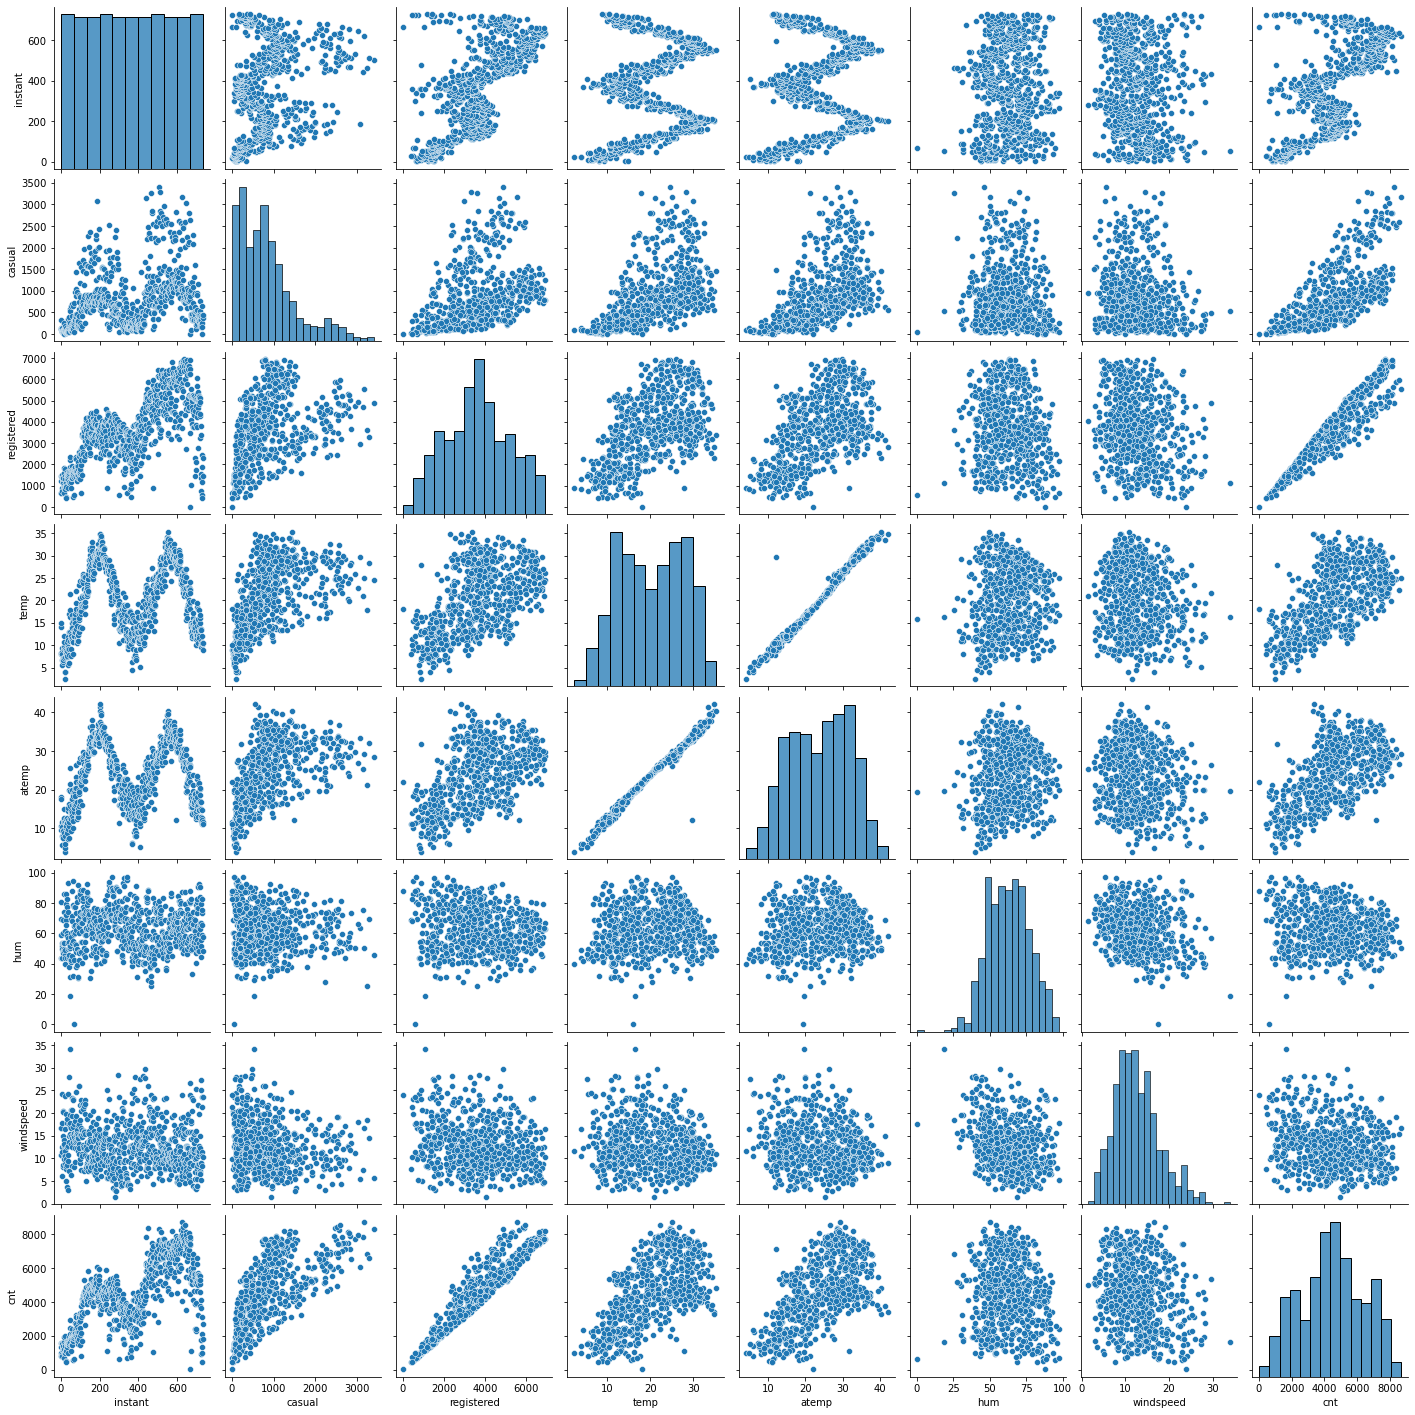

In [17]:
sns.pairplot(bikesharing_df[['instant', 'casual', 'registered', 'temp','atemp','hum','windspeed','cnt']])
plt.show()

Checking correlation using heatmap

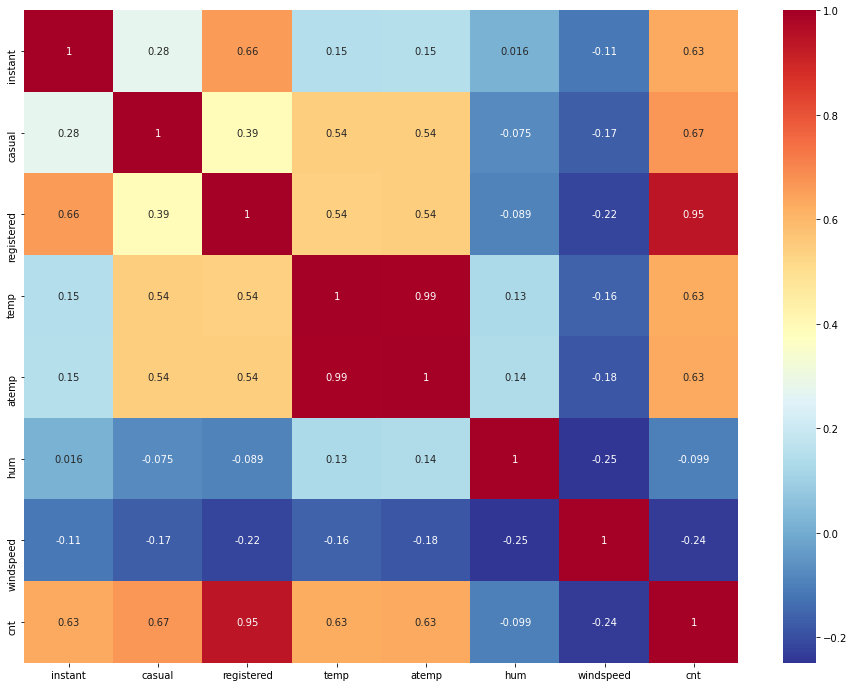

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(bikesharing_df[['instant', 'casual', 'registered', 'temp','atemp','hum','windspeed','cnt']].corr(), cmap='RdYlBu_r', annot=True);

### Data Cleaning

In [19]:
# Drop Unnecessary variables
bike_new=bikesharing_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## 1. 2. 4. Understanding the data using Basic Visualisation

###### Checking frequency of target variable (cnt)

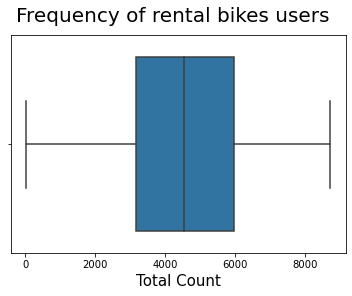

In [20]:
sns.boxplot(bike_new.cnt)
plt.suptitle('Frequency of rental bikes users', fontsize = 20)   # Plot heading 
plt.xlabel('Total Count', fontsize = 15) ; 

###### Insights:
- For target varoable cnt:
    - min : 0
    - max : between 8000 to 10000
    - Median : lies between 4000 to 6000. 
- There is no outliers for the target variable.

###### Visualising the numerical values

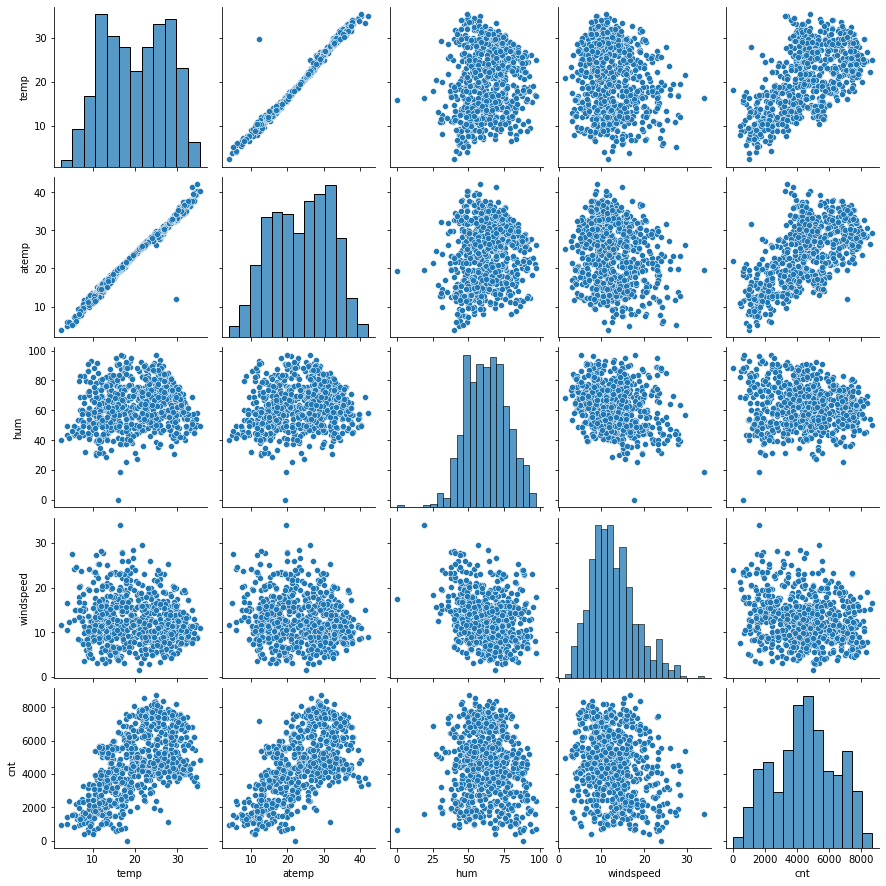

In [21]:
sns.pairplot(bike_new[['temp','atemp','hum','windspeed','cnt']])
plt.show()

Checking the correlation using heatmap

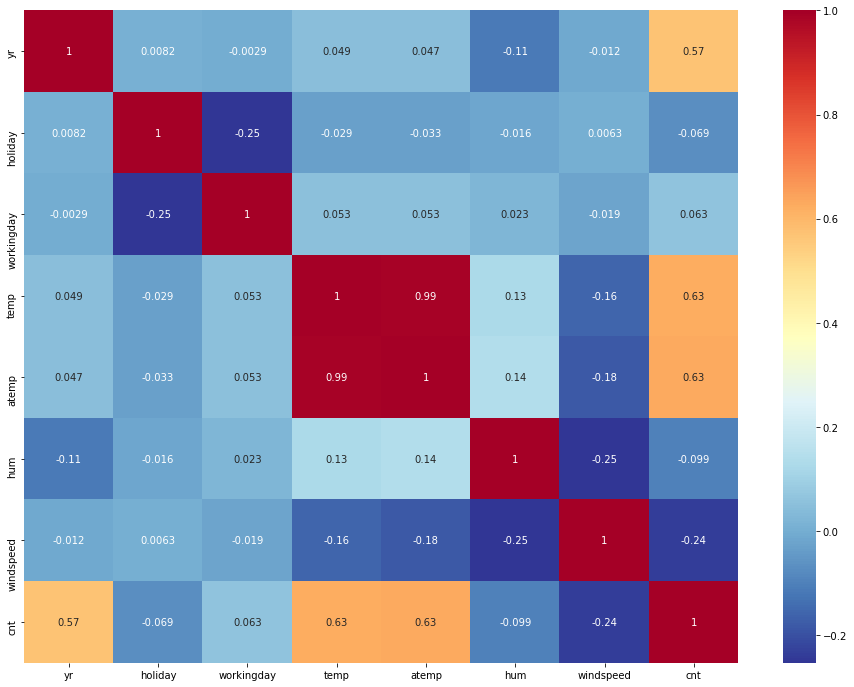

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(bike_new.corr(), cmap='RdYlBu_r', annot=True); 
plt.show()

###### Insights:
- For numerical variables:
    - temp and atemp are highly corellated with each other having 99%.
    - w.r.t. cnt variable
        - temp and atemp have high linear significane and equal level of correlation as 63%. 
            - We can drop any one of these variables. To avoid multicollinearity
        - hum, windspeed have significane, yet we have to analyse
- Therefore Linear regession can be considered as there are atleast few variables which have linear relationship

###### Visualising the Categorical values

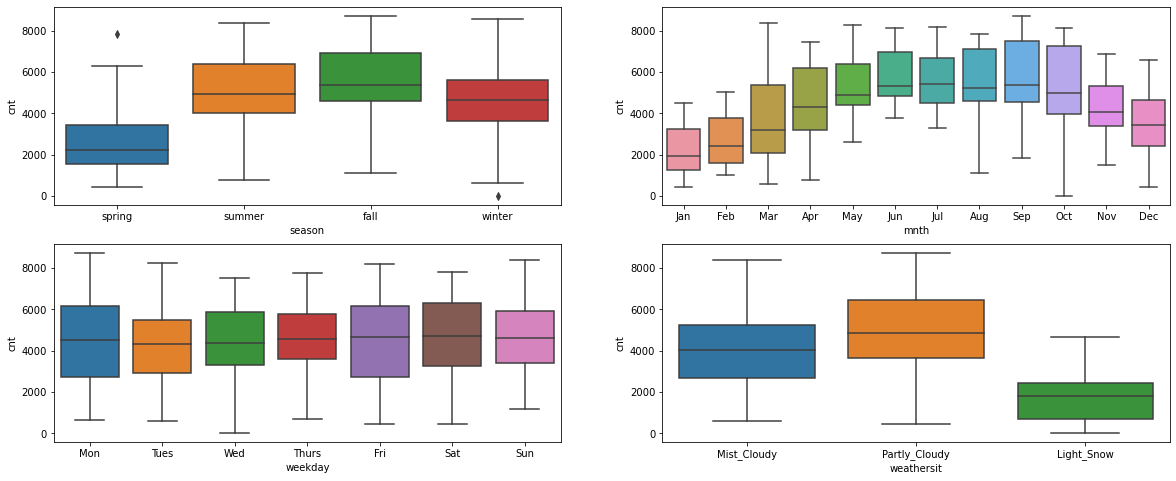

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt', data=bike_new);
plt.subplot(2,2,2)
sns.boxplot(x='mnth',y='cnt', data=bike_new);
plt.subplot(2,2,3)
sns.boxplot(x='weekday',y='cnt', data=bike_new);
plt.subplot(2,2,4)
sns.boxplot(x='weathersit',y='cnt', data=bike_new);

###### Insights:
- General:
    - The season box plots indicates that more bikes are rent during season 3 which is fall season.
    - The month box plots indicates that maximum bikes are rent during september month.
    - The weekday box plots indicates that more bikes are rent during saturday.
    - The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.
- Outliers:
    - Minimal outliers are present only for variables season

###### To drop either atemp or temp

From Data-Dictionary of the dataset:
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
<br>We can drop atemp.

In [24]:
#drop atemp
bike_new.drop('atemp',axis=1,inplace=True)

# check variables with info
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 88.4+ KB


All variable seems good for modeling. So we can proceed with modeling

# 2. Data preparation for model 

Data preparation for model (test_train_split, rescaling, etc)
1. Encoding
    1. Converting categorical binary variables to numeric 0s and 1s
    2. Other categorical variables to dummy variables
2. Splitting into train and test
3. Rescaling of variables
    - MinMax Scaling (normalisation) : Compresses the data between 0 and 1
    - Standardisation (mean=0 and sigma=1)

## 2. 1. Encoding

## 2. 1. Other categorical variables to dummy variables

In [25]:
print(bike_new.season)

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object


###### Create Dummy variables for season

In [26]:
# creating and dropping redundant dummy variables for year column 
season = pd.get_dummies(bike_new.season, drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


###### Create Dummy variables for mnth

In [27]:
# creating and dropping redundant dummy variables for year column 
months = pd.get_dummies(bike_new.mnth, drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


###### Create Dummy variables for weekday

In [28]:
# creating and dropping redundant dummy variables for year column 
weekdays = pd.get_dummies(bike_new.weekday, drop_first=True)
weekdays.head()

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


###### Create Dummy variables for weathersit

In [29]:
# creating and dropping redundant dummy variables for year column 
weathersit = pd.get_dummies(bike_new.weathersit, drop_first=True)
weathersit.head()

,Mist_Cloudy,Partly_Cloudy
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [30]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Partly_Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Partly_Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Partly_Cloudy,9.305237,43.6957,12.522300,1600


#### Concat created dummies dataframe with original dataframe

Concat [season, months, weekdays, weathersit] to bike_new

In [31]:
# by default axis is 0 horizonatlly (rows) - The axis to concatenate along
bike_new = pd.concat([bike_new, season, months, weekdays, weathersit], axis = 1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
0,spring,0,Jan,0,Mon,0,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tues,0,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,Partly_Cloudy,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,1
3,spring,0,Jan,0,Thurs,1,Partly_Cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,1
4,spring,0,Jan,0,Fri,1,Partly_Cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


#### Drop original columns from dataframe after creating dummies and concat with original frame

In [32]:
# drop
bike_new.drop(['season', 'mnth', 'weekday', 'weathersit'] , axis='columns', inplace=True)
bike_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# Check all variables and memory usage
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   spring         730 non-null    uint8  
 8   summer         730 non-null    uint8  
 9   winter         730 non-null    uint8  
 10  Aug            730 non-null    uint8  
 11  Dec            730 non-null    uint8  
 12  Feb            730 non-null    uint8  
 13  Jan            730 non-null    uint8  
 14  Jul            730 non-null    uint8  
 15  Jun            730 non-null    uint8  
 16  Mar            730 non-null    uint8  
 17  May            730 non-null    uint8  
 18  Nov       

###### Insights:
- Totally 29 Columns and 730 Rows are present
- All variables are now well prepared for processing with model
- Memory usage of the dataframe is 76.3 KB

Plot a heat map and take a look at the correlations between all the existing variables.

## 2. 2. Splitting into train and test

Importing train_test_split from sklearn

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

Splitting the data as train and test data

In [35]:
df_train, df_test = train_test_split(bike_new, train_size=0.70, test_size = 0.30, random_state = 100)
print("df_train : ",df_train.shape)
print("df_test : ",df_test.shape)

df_train :  (510, 29)
df_test :  (219, 29)


## 2. 3. Rescaling of variables

## 2. 3. 1. MinMax Scaling (normalisation)

- Compresses the data between 0 and 1

Check which variables to select for min-max scaling

In [36]:
df_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,1
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,1
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [37]:
# Checking the statistical details
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.627451
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.483958
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Insights:
- 'temp', 'hum', 'windspeed','cnt' are the variables which have be processed with min-max scaling

importing min-max scaling from preprocessing of sklearn

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# 1. Create (Instantiate) an object
scaler = MinMaxScaler()

# Create list with numeric parameters
num_vars = ['temp', 'hum', 'windspeed','cnt']

# 2. Fit on subset on df_train with num_vars data(i.e., df_train[num_vars]) and store back to the subset of the same dataframe
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [40]:
# To test against MinMaxScaling fit
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [41]:
# Checking the statistical details
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plot a heat map and take a look at the correlations between all the existing variables.

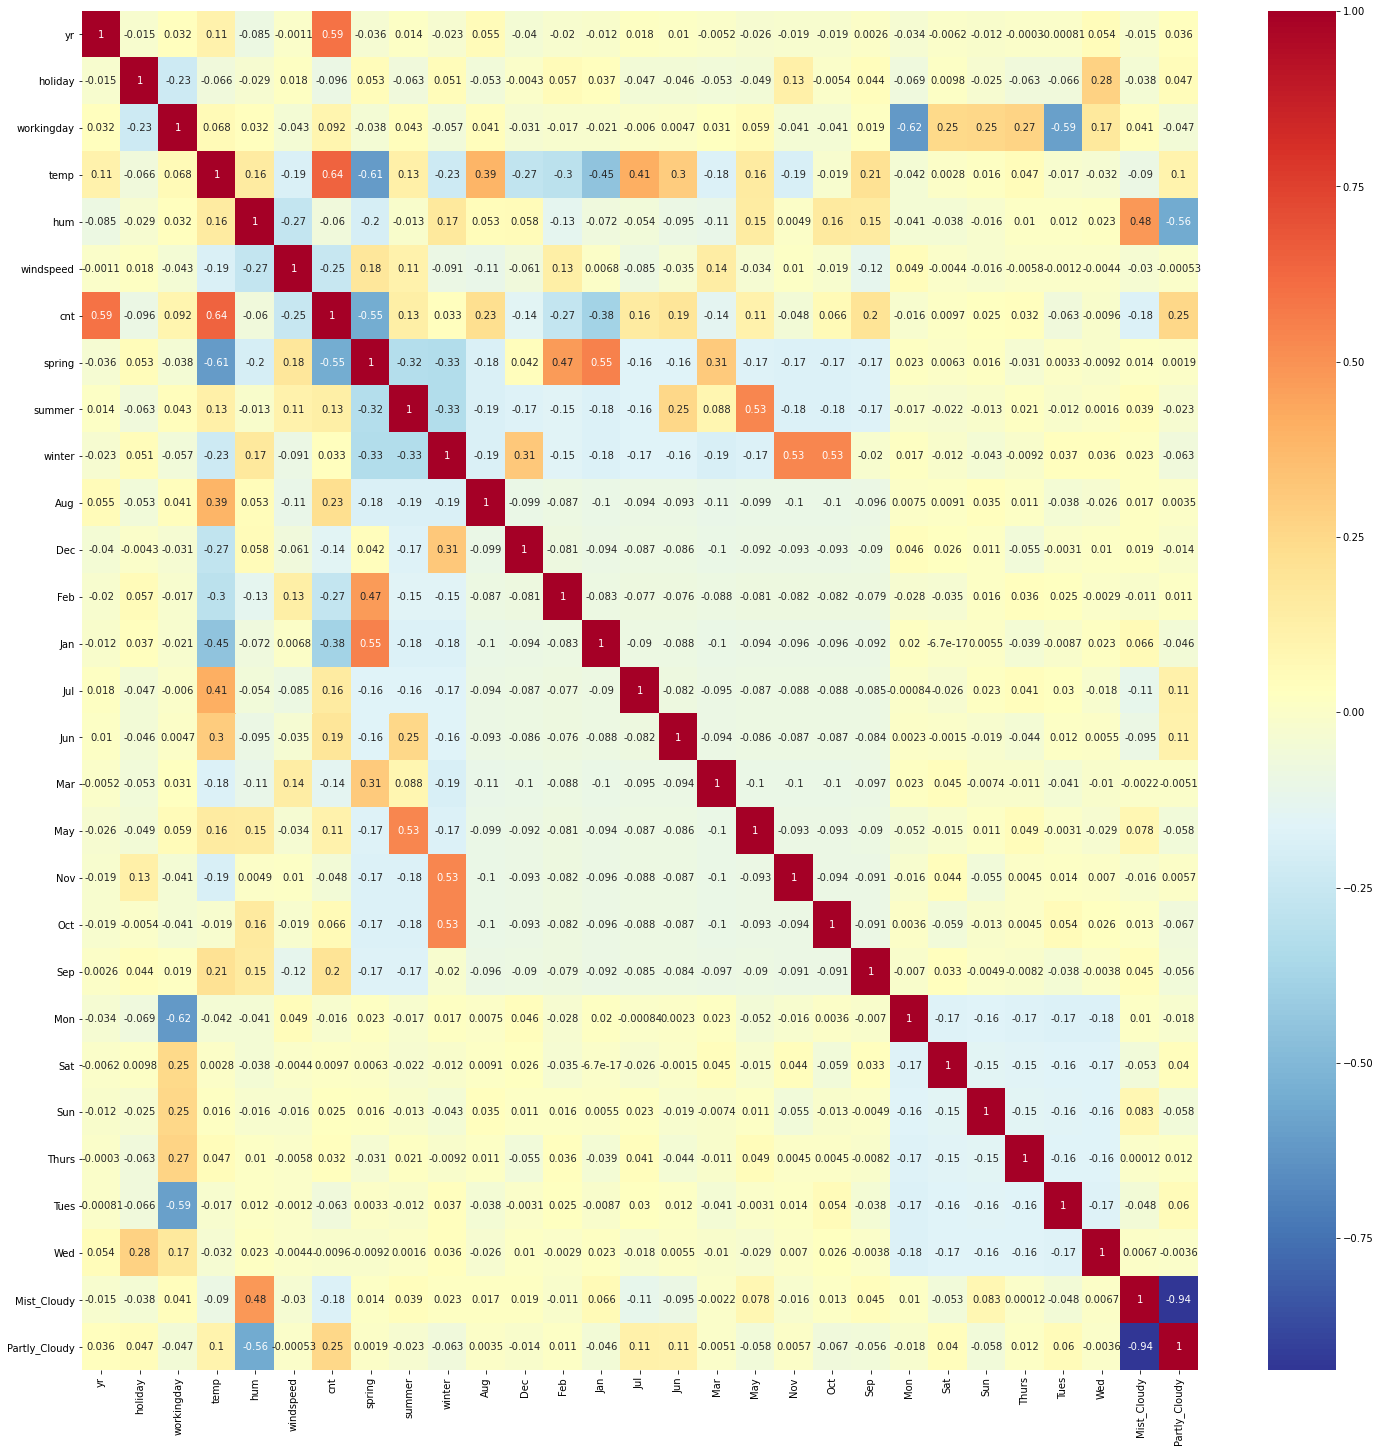

In [42]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), cmap='RdYlBu_r', annot=True); 
plt.show()

###### Insights:
- Some variables having correlation w.r.t. target variable 'cnt'
    - 'temp'          : 65% +ve correlation
    - 'holiday'       : 9.5% -ve correlation
    - 'workingday'    : 9.2% +ve correlation
    - 'hum'           : 5.9% -ve correlation
    - 'windspeed'     : 25% -ve correlation    
    - 'spring'        : 55% -ve correlation
    - '2019'          : 59% +ve correlation
    - 'Aug'           : 23% +ve correlation
    - 'Partly_Cloudy' : 25% +ve correlation

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`

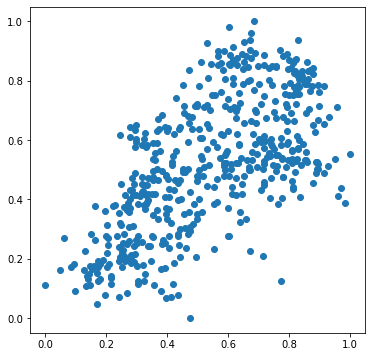

In [43]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

###### Insights:
- temp is having correlation w.r.t. target variable 'cnt'. Lets do analysing the variables

In [44]:
# fetching the target and predictors of the model
y_train = df_train.pop('cnt')
X_train = df_train

### Model 1

#### Building a linear model

- Before feature selection using RME
<pre></pre>
Importing the statsmodel api to add constant

In [45]:
import statsmodels.api as sm

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [46]:
# Have to add constant to LinearRegressionModel as we are going to see the statsmodel summary
X_train_model1 = sm.add_constant(X_train)

In [47]:
# Creating the linearRegressionModel and fit the model
lrm_model1 = sm.OLS(y_train, X_train_model1).fit() # Running the linear model

In [48]:
# Statistical Summary of model
print(lrm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 05 May 2021   Prob (F-statistic):          8.74e-182
Time:                        16:56:59   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0370      0.043      0.858

###### Insights:
Observations for existing model variables:
- p-value with cofficient%
<table>
    <thead>
        <tr><th> Variable</th><th> P-Value</th><th>Magnitude of Cofficient</th><th>Postive Correlation</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Tues</td><td>0.625</td><td>0.0075</td><td>No</td></tr>
        <tr><td>Sun</td><td>0.718</td><td>0.0054</td><td>Yes</td></tr>
        <tr><td>Sat</td><td>0.793</td><td>0.0038</td><td>No</td></tr>
        <tr><td>Oct</td><td>0.833</td><td>0.0075</td><td>Yes</td></tr>
        <tr><td>Mar</td><td>0.966</td><td>0.0010</td><td>Yes</td></tr>
        <tr><td>Jun</td><td>0.906</td><td>0.0030</td><td>No</td></tr>
        <tr><td>Aug</td><td>0.669</td><td>0.0144</td><td>Yes</td></tr>
        <tr><td>holiday</td><td>0.074</td><td>0.0448</td><td>No</td></tr>        
        <tr><td></td></tr>
    </tbody>
</table> 
    
        
Initial Model's R-Squared, Adjusted R2, F-statistic, Prob (F-statistic)

<table>
    <thead>
        <tr><th> Feature Process</th><th> Model Name</th><th> R-Squared</th><th> Adj. R-squared</th><th>  F-statistic</th><th> Prob (F-statistic)</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Before RFE</td><td>Model 1</td><td>0.853</td><td>0.845</td><td>103.8</td><td>8.74e-182</td></tr>
        <tr><td></td></tr>
    </tbody>
</table>  

In [49]:
# Checking Model 1 train variables columns and size
print(X_train_model1.columns)
X_train_model1.columns.size

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues',
       'Wed', 'Mist_Cloudy', 'Partly_Cloudy'],
      dtype='object')


29

const is the intercept variable, hence can get dropped

In [50]:
# Creating the linearRegressionModel and fit the model
X_train_model1 = X_train_model1.drop(['const'],axis=1)

In [51]:
# Checking Model 1 train variables columns and size
print(X_train_model1.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed',
       'Mist_Cloudy', 'Partly_Cloudy'],
      dtype='object')


# 3. Training the model

Common Function to calculate VIF

In [52]:
def calculate_VIF(model_df):
    # Code for VIF 
    vif = pd.DataFrame()
    vif['Features'] = model_df.columns
    vif['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif


## 3. 1. Feature Selection with RFE

Using automated RFE model is going to build. 

For this we use RFE, LinearRegression From sklearn

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Import LinearRegression, perform automated feature selection with 15 variables minimum and fit the model


RFE needs 2 things 
- Fitted model with linearRegression
- the number of predictors we have to choose for model

In [54]:
# create instance for LinearRegression
lm_RFE = LinearRegression()
lm_RFE.fit(X_train_model1, y_train)

# running RFE
rfe = RFE(lm_RFE,10)

#fit the model
rfe = rfe.fit(X_train_model1, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

Checking the value of variables with RFE Processing

In [55]:
list(zip(X_train_model1.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 5),
 ('Aug', False, 13),
 ('Dec', False, 9),
 ('Feb', False, 10),
 ('Jan', False, 7),
 ('Jul', False, 3),
 ('Jun', False, 16),
 ('Mar', False, 18),
 ('May', False, 11),
 ('Nov', False, 8),
 ('Oct', False, 14),
 ('Sep', False, 4),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', False, 12),
 ('Thurs', False, 19),
 ('Tues', True, 1),
 ('Wed', False, 17),
 ('Mist_Cloudy', True, 1),
 ('Partly_Cloudy', True, 1)]

###### Fetching RFE Selected Variables

Variables With RFE

In [56]:
colsSupportingRFE = X_train_model1.columns[rfe.support_]
print(colsSupportingRFE.size)
colsSupportingRFE

10


Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'Mon',
       'Tues', 'Mist_Cloudy', 'Partly_Cloudy'],
      dtype='object')

###### Insights:
- From above observation, using RFE... it is observed that ['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer','winter', '2019', 'Jul', 'Sep', 'Mon', 'Tues', 'Mist_Cloudy', 'Partly_Cloudy'] have to be used for model

Variables Not with RFE

In [57]:
colsNotRFE = X_train.columns[~rfe.support_]
print(colsNotRFE.size)
colsNotRFE

18


Index(['hum', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

###### Insights:
- From above observation, using RFE... it is observed that 'workingday', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun','Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues','Wed' are not useful for model

- So drop'workingday', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun','Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues','Wed'

In [58]:
X_train_model1.drop(colsNotRFE,axis=1,inplace=True)
print(X_train_model1.columns)
X_train_model1.shape

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'Mon',
       'Tues', 'Mist_Cloudy', 'Partly_Cloudy'],
      dtype='object')


(510, 10)

### Model 2

#### Building a linear model with RFE Features

- Building model after RFE feature selection

In [59]:
# Have to add constant to LinearRegressionModel as we are going to see the statsmodel summary
X_train_model2 = sm.add_constant(X_train_model1)

In [60]:
# Creating the linearRegressionModel and fit the model
lrm_model2 = sm.OLS(y_train, X_train_model2).fit() # Running the linear model

In [61]:
# Statistical Summary of model
print(lrm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          7.47e-181
Time:                        16:57:00   Log-Likelihood:                 478.11
No. Observations:                 510   AIC:                            -936.2
Df Residuals:                     500   BIC:                            -893.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0177      0.025      0.718

###### Insights:
Observations for existing model variables (StatsModel Summary):
- p-value with cofficient%
    - All variable p-values are 0 except Tues(0.361) and holiday (0.018).

Checking VIF Value

In [62]:
X_train_model2.drop('const',axis=1,inplace=True)

In [63]:
# import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
print(calculate_VIF(X_train_model2))

        Features    VIF
2     workingday  34.42
6            Mon   8.58
9  Partly_Cloudy   8.53
8    Mist_Cloudy   8.47
7           Tues   8.17
1        holiday   2.28
3           temp   1.65
5         spring   1.61
4      windspeed   1.06
0             yr   1.02


###### Insights:
Observations of VIF for variables > 5 VIF
-     workingday  34.42
-            Mon   8.58
-  Partly_Cloudy   8.53
-    Mist_Cloudy   8.47
-           Tues   8.17

Comparing variables with P-Value and VIF

<table>
    <thead>
        <tr><th> Variable Name</th><th> P-Value</th><th> VIF Value</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>workingday</td><td>0.000</td><td>34.42</td></tr>
        <tr><td>Mon</td><td>0.000</td><td>8.58</td></tr>
        <tr><td>Partly_Cloudy</td><td>0.000</td><td>8.53</td></tr>
        <tr><td>Mist_Cloudy</td><td>0.000</td><td>8.47</td></tr>
        <tr><td>Tues</td><td>0.361</td><td>8.17</td></tr>
    </tbody>
</table>
    
Comparing Model's with R-Squared, Adjusted R2, F-statistic, Prob (F-statistic)

<table>
    <thead>
        <tr><th> Feature Process</th><th> Model Name</th><th> R-Squared</th><th> Adj. R-squared</th><th>  F-statistic</th><th> Prob (F-statistic)</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Before RFE</td><td>Model 1</td><td>0.853</td><td>0.845</td><td>103.8</td><td>8.74e-182</td></tr>
        <tr><td>After RFE</td><td>Model 2</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td></td></tr>
    </tbody>
</table>   

Dropping Tues as it has highest P-Value value. This is not useful for model. As it might create multicollinearity. 

## 3. 2. Minimize model (if necessary)

In [65]:
X_train_model2.drop('Tues', axis=1, inplace=True)
print(X_train_model2.columns)
X_train_model2.shape

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'Mon',
       'Mist_Cloudy', 'Partly_Cloudy'],
      dtype='object')


(510, 9)

### Model 3

#### Building a linear model by minimizing factors

- Building model minimized 9 features

In [66]:
# Have to add constant to LinearRegressionModel as we are going to see the statsmodel summary
X_train_model3 = sm.add_constant(X_train_model2)

In [67]:
# Creating the linearRegressionModel and fit the model
lrm_model3 = sm.OLS(y_train, X_train_model3).fit() # Running the linear model

In [68]:
# Statistical Summary of model
print(lrm_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          7.47e-181
Time:                        16:57:00   Log-Likelihood:                 478.11
No. Observations:                 510   AIC:                            -936.2
Df Residuals:                     500   BIC:                            -893.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0064      0.032      0.201

###### Insights:
Observations for existing model variables (StatsModel Summary):
- p-value with cofficient%
    - All variable p-values are 0 except holiday(0.146).

Now it is observed as p-values reached optimal value and also there is little decrease in both R2 and Adjusted R2.

Checking VIF Value

In [69]:
X_train_model3.drop('const',axis=1,inplace=True)

In [70]:
print(calculate_VIF(X_train_model3)) #calculate_VIF(X_train_model2)

        Features    VIF
8  Partly_Cloudy  10.01
3           temp   9.14
7    Mist_Cloudy   5.60
2     workingday   5.12
4      windspeed   4.23
0             yr   2.06
5         spring   2.01
6            Mon   1.94
1        holiday   1.16


###### Insights:
Observations of VIF for variables > 5 VIF
-	Partly_Cloudy 10.01
-	temp	9.14
-   Mist_Cloudy 5.06
-   Workingday	5.12

Comparing variables with P-Value and VIF

<table>
    <thead>
        <tr><th> Variable Name</th><th> P-Value</th><th> VIF Value</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Partly_Cloudy</td><td>0.000</td><td>10.01</td></tr>
        <tr><td>temp</td><td>0.000</td><td>9.14</td></tr>
        <tr><td>Mist_Cloudy</td><td>0.000</td><td>5.06</td></tr>
        <tr><td>workingday</td><td>0.000</td><td>5.12</td></tr>
    </tbody>
</table>
        
Comparing Model's with R-Squared, Adjusted R2, F-statistic, Prob (F-statistic)

<table>
    <thead>
        <tr><th> Feature Process</th><th> Model Name</th><th> R-Squared</th><th> Adj. R-squared</th><th>  F-statistic</th><th> Prob (F-statistic)</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Before RFE</td><td>Model 1</td><td>0.853</td><td>0.845</td><td>103.8</td><td>8.74e-182</td></tr>
        <tr><td>After RFE</td><td>Model 2</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Minimize(drop Tues) - From Model2</td><td>Model 3</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td></td></tr>
    </tbody>
</table>   
    

Dropping variable 'Partly_Cloudy' are having high VIF. They are not used for model.

In [71]:
X_train_model3 = X_train_model3.drop('Partly_Cloudy',axis=1)

### Model 4

#### Building a linear model by minimizing factors

- Building model minimized 8 features

In [72]:
# Have to add constant to LinearRegressionModel as we are going to see the statsmodel summary
X_train_model4 = sm.add_constant(X_train_model3)

In [73]:
# Creating the linearRegressionModel and fit the model
lrm_model4 = sm.OLS(y_train, X_train_model4).fit() # Running the linear model

In [74]:
# Statistical Summary of model
print(lrm_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     220.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          6.31e-159
Time:                        16:57:00   Log-Likelihood:                 423.63
No. Observations:                 510   AIC:                            -829.3
Df Residuals:                     501   BIC:                            -791.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2685      0.024     11.408      

###### Insights:
Observations for existing model variables (StatsModel Summary):
- p-value with cofficient%
    - All variable p-values are 0 except holiday(0.252), workingday(0.004) and Mon(0.003).
    
<div class="alert alert-block alert-warning" font-size=3>
<b>Note:</b> <br>1. Now it is observed as p-values reached optimal value and there is change of decrease in R2, Adjusted R2 compared with Model3. <br>2. <b>0.043</b> is the difference between R^2 of Model3 and Model4. Hence we can move further with this model.</div>

Checking VIF Value

In [75]:
X_train_model4.drop('const',axis=1,inplace=True)

In [76]:
print(calculate_VIF(X_train_model4))

      Features   VIF
3         temp  5.31
2   workingday  4.58
4    windspeed  3.88
0           yr  2.03
6          Mon  1.81
5       spring  1.65
7  Mist_Cloudy  1.48
1      holiday  1.12


###### Insights:
- VIF for variables of this model is < 5, other than temp. 


Comparing Model's with R-Squared, Adjusted R2, F-statistic, Prob (F-statistic)

<table>
    <thead>
        <tr><th> Feature Process</th><th> Model Name</th><th> R-Squared</th><th> Adj. R-squared</th><th>  F-statistic</th><th> Prob (F-statistic)</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Before RFE</td><td>Model 1</td><td>0.853</td><td>0.845</td><td>103.8</td><td>8.74e-182</td></tr>
        <tr><td>After RFE</td><td>Model 2</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Minimize(drop Tues) - From Model2</td><td>Model 3</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Drop Partly_Cloudy - From Model 3</td><td>Model 4</td><td>0.779</td><td>0.776</td><td>220.9</td><td>6.31e-159</td></tr>
       <tr><td></td></tr>
    </tbody>
</table>
    
<div class="alert alert-block alert-warning">
<b>Note:</b> Since holiday is having 25% of P-value, dropping the variable from model.</div>

In [77]:
 X_train_model4.drop('holiday',axis=1,inplace=True)

### Model 5

#### Building a linear model by minimizing factors

- Building model minimized 7 features

In [78]:
# Have to add constant to LinearRegressionModel as we are going to see the statsmodel summary
X_train_model5 = sm.add_constant(X_train_model4)

In [79]:
# Creating the linearRegressionModel and fit the model
lrm_model5 = sm.OLS(y_train, X_train_model5).fit() # Running the linear model

In [80]:
# Statistical Summary of model
print(lrm_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     252.2
Date:                Wed, 05 May 2021   Prob (F-statistic):          7.38e-160
Time:                        16:57:00   Log-Likelihood:                 422.96
No. Observations:                 510   AIC:                            -829.9
Df Residuals:                     502   BIC:                            -796.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2624      0.023     11.440      

###### Insights:
Observations for existing model variables (StatsModel Summary):
- p-value with cofficient%
    - All variable p-values are 0 except Mon (0.001).

Now it is observed as p-values reached optimal value and R2, Adjusted R2 when compared with Model4 remains the same. 

Checking VIF Value

In [81]:
X_train_model5.drop('const',axis=1,inplace=True)

In [82]:
print(calculate_VIF(X_train_model5))

      Features   VIF
2         temp  5.12
1   workingday  4.21
3    windspeed  3.82
0           yr  2.03
5          Mon  1.72
4       spring  1.62
6  Mist_Cloudy  1.48


###### Insights:
-VIF for variables of this model < 5 except temp.


Comparing Model's with R-Squared, Adjusted R2, F-statistic, Prob (F-statistic)

<table>
    <thead>
        <tr><th> Feature Process</th><th> Model Name</th><th> R-Squared</th><th> Adj. R-squared</th><th>  F-statistic</th><th> Prob (F-statistic)</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Before RFE</td><td>Model 1</td><td>0.853</td><td>0.845</td><td>103.8</td><td>8.74e-182</td></tr>
        <tr><td>After RFE</td><td>Model 2</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Minimize(drop Tues) - From Model2</td><td>Model 3</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Drop Partly_Cloudy - From Model3</td><td>Model 4</td><td>0.779</td><td>0.776</td><td>220.9</td><td>6.31e-159</td></tr>
        <tr><td>Drop holiday - From Model4</td><td>Model 5</td><td>0.779</td><td>0.775</td><td>252.2</td><td>7.38e-160</td></tr>
       <tr><td></td></tr>
    </tbody>
</table>
    

<div class="alert alert-block alert-warning">
<b>Note:</b> Even though, R2 and Adj.R2 of Model4, Model 5 are looking similar, Since VIF of temp is highest (5.12), dropping 'Mon' as it's p-value is not zero</div>

In [83]:
 X_train_model5.drop('Mon',axis=1,inplace=True)

### Model 6

#### Building a linear model by minimizing factors

- Building model minimized 6 features

In [84]:
# Have to add constant to LinearRegressionModel as we are going to see the statsmodel summary
X_train_model6 = sm.add_constant(X_train_model5)

In [85]:
# Creating the linearRegressionModel and fit the model
lrm_model6 = sm.OLS(y_train, X_train_model6).fit() # Running the linear model

In [86]:
# Statistical Summary of model
print(lrm_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     286.2
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.31e-158
Time:                        16:57:00   Log-Likelihood:                 417.10
No. Observations:                 510   AIC:                            -820.2
Df Residuals:                     503   BIC:                            -790.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2880      0.022     13.140      

###### Insights:
Observations for existing model variables (StatsModel Summary):
- p-value with cofficient%
    - All variable p-values are 0 except workingday (0.070).

Now it is observed as there is p-values reached optimal value and R2, Adjusted R2 when compared with Model5 there is a difference of 0.003. 

Checking VIF Value

In [87]:
X_train_model6.drop('const',axis=1,inplace=True)

In [88]:
print(calculate_VIF(X_train_model6))

      Features   VIF
2         temp  4.38
3    windspeed  3.65
1   workingday  2.88
0           yr  2.02
4       spring  1.56
5  Mist_Cloudy  1.46


###### Insights:
-VIF for variables of this model < 5 except temp.


Comparing Model's with R-Squared, Adjusted R2, F-statistic, Prob (F-statistic)

<table>
    <thead>
        <tr><th> Feature Process</th><th> Model Name</th><th> R-Squared</th><th> Adj. R-squared</th><th>  F-statistic</th><th> Prob (F-statistic)</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Before RFE</td><td>Model 1</td><td>0.853</td><td>0.845</td><td>103.8</td><td>8.74e-182</td></tr>
        <tr><td>After RFE</td><td>Model 2</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Minimize(drop Tues) - From Model2</td><td>Model 3</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Drop Partly_Cloudy - From Model3</td><td>Model 4</td><td>0.779</td><td>0.776</td><td>220.9</td><td>6.31e-159</td></tr>
        <tr><td>Drop holiday - From Model4</td><td>Model 5</td><td>0.779</td><td>0.775</td><td>252.2</td><td>7.38e-160</td></tr>
        <tr><td>Drop Mon - From Model5</td><td>Model 6</td><td>0.773</td><td>0.771</td><td>286.2</td><td>1.31e-158</td></tr>
       <tr><td></td></tr>
    </tbody>
</table>
    

<div class="alert alert-block alert-warning">
<b>Note:</b>
<b>Note:</b><br>1. There is a little change in R2 and Adj.R2 of Model6, Model 5.<br>2. Eventhough VIF all variables is less than 5, dropping 'workingday' as it's p-value is 7% which is greater than 0.05</div></div>

In [89]:
 X_train_model6.drop('workingday',axis=1,inplace=True)

### Model 7

#### Building a linear model by minimizing factors

- Building model minimized 5 features

In [90]:
# Have to add constant to LinearRegressionModel as we are going to see the statsmodel summary
X_train_model7 = sm.add_constant(X_train_model6)

In [91]:
# Creating the linearRegressionModel and fit the model
lrm_model7 = sm.OLS(y_train, X_train_model7).fit() # Running the linear model

In [92]:
# Statistical Summary of model
print(lrm_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     341.2
Date:                Wed, 05 May 2021   Prob (F-statistic):          3.50e-159
Time:                        16:57:00   Log-Likelihood:                 415.43
No. Observations:                 510   AIC:                            -818.9
Df Residuals:                     504   BIC:                            -793.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2990      0.021     14.172      

###### Insights:
Observations for existing model variables (StatsModel Summary):
- p-value with cofficient%
    - All variable p-values are 0.


<div class="alert alert-block alert-success">
    <b><u>P-Values:</u></b><br>          Now it is observed as p-values reached optimal value<br><b><u>R2-Values:</u></b><br>             R2, Adjusted R2 when compared with Model6, has a minute difference of 1%</div>

Checking VIF Value

In [93]:
X_train_model7.drop('const',axis=1,inplace=True)

In [94]:
print(calculate_VIF(X_train_model7))

      Features   VIF
2    windspeed  3.59
1         temp  3.52
0           yr  2.02
3       spring  1.51
4  Mist_Cloudy  1.43


###### Insights:
-VIF for variables of this model < 5 except temp.


Comparing Model's with R-Squared, Adjusted R2, F-statistic, Prob (F-statistic)

<table>
    <thead>
        <tr><th> Feature Process</th><th> Model Name</th><th> R-Squared</th><th> Adj. R-squared</th><th>  F-statistic</th><th> Prob (F-statistic)</th></tr>
    </thead>
    <tbody>
        <tr><td></td></tr>
        <tr><td>Before RFE</td><td>Model 1</td><td>0.853</td><td>0.845</td><td>103.8</td><td>8.74e-182</td></tr>
        <tr><td>After RFE</td><td>Model 2</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Minimize(drop Tues)</td><td>Model 3</td><td>0.822</td><td>0.818</td><td>255.9</td><td>7.47e-181</td></tr>
        <tr><td>Drop Partly_Cloudy - From Model3</td><td>Model 4</td><td>0.779</td><td>0.776</td><td>220.9</td><td>6.31e-159</td></tr>
        <tr><td>Drop holiday - From Model4</td><td>Model 5</td><td>0.779</td><td>0.775</td><td>252.2</td><td>7.38e-160</td></tr>
        <tr><td>Drop Mon - From Model5</td><td>Model 6</td><td>0.773</td><td>0.771</td><td>286.2</td><td>1.31e-158</td></tr>
       <tr><td></td></tr>
        <tr><td>Drop workingday - From Model6</td><td>Model 7</td><td>0.772</td><td>0.770</td><td>341.2</td><td>3.50e-159</td></tr>
       <tr><td></td></tr>
       <tr><td></td></tr>
    </tbody>
</table>
    
    
<div class="alert alert-block alert-success">
    <b><u>P-Values:</u></b><br>Now it is observed as p-values reached optimal value (All p-values is 0)<br><b><u>R2-Values:</u></b><br>R2, Adjusted R2 when compared with Model6, has a minute difference of 1%<br><b><u>VIF-Values:</u></b><br>VIF of all variables are less than 5<br><b><u>Variables Count:</u></b><br>5<br><b><u>Variables Names(With VIF Value):</u></b><br>windspeed(3.59), temp(3.52), yr(2.02), spring(1.51), Mist_Cloudy(1.43)<br><br><b><i>Hence, this model is considered as FINAL MODEL</i></b></div>

<font color=blue>$  MODEL 7 $</font> is the final model with 5 features for our analysis.



<div class="alert alert-block alert-success">
<b>Success:</b> <br>
    1. Model 7 can be taken for analysis. <br>2. It has 5 Features.
    <br>3. Also there is No Multicollinearity between the predictor variables
</div>

Checking column names before going into residual analysis

In [95]:
# Checking the features present in Model 7
print(X_train_model7.columns)
X_train_model7.shape

Index(['yr', 'temp', 'windspeed', 'spring', 'Mist_Cloudy'], dtype='object')


(510, 5)

# 4. Residual Analysis    

Generalize the code

In [96]:
# Holding the value in a variable that is being used across.
X_trained_final = X_train_model7
lrm_model_final = lrm_model7

# To check columns of final model dataframe
X_trained_final.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'Mist_Cloudy'], dtype='object')

Calculating y_train_pred

In [97]:
# Adding constant to Model 5 data
X_train_model = sm.add_constant(X_trained_final)

# Predict train data
y_train_pred = lrm_model_final.predict(X_train_model)

Calculating Residuals

In [98]:
residual = y_train-y_train_pred

Plotting graphs to ensure the assumptions for linear regression

##### Assumption  Errors will be having normally distributed

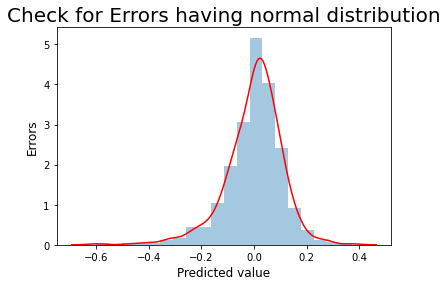

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, kde_kws={"color":"red"}, bins = 20)
plt.title('Check for Errors having normal distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Predicted value', fontsize = 12)   
plt.ylabel('Errors', fontsize = 12);

<div class="alert alert-block alert-warning" font-size=3>
<b>Observation:</b> <br>Errors are normally distributed</div>

##### Assumption for linear relationship - QQPlot

qqplot of the residuals against quantiles of t-distribution with 4 degrees of freedom including the loc and scale:

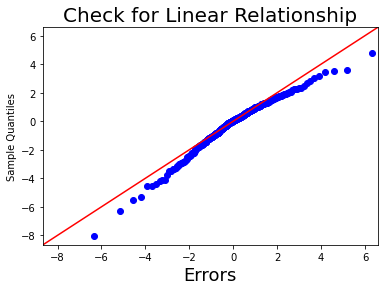

In [100]:
import scipy.stats as stats
sm.qqplot(residual, stats.t, fit=True, line="45", distargs=(4,))
plt.title('Check for Linear Relationship', fontsize = 20)  
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18);  

<div class="alert alert-block alert-warning" font-size=3>
<b>Observation:</b> <br>Linear Relationship exists with error terms</div>

##### Assumption: Error Terms Being Independent

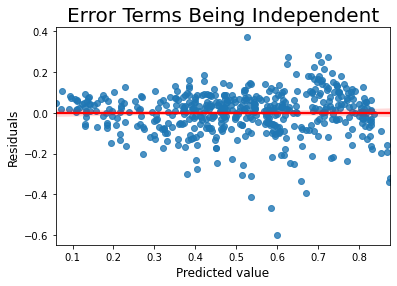

In [101]:
sns.regplot(x=y_train_pred, y=residual, line_kws={"color": "red"})
plt.title('Error Terms Being Independent', fontsize = 20)                  # Plot heading 
plt.xlabel('Predicted value', fontsize = 12)   
plt.ylabel('Residuals', fontsize = 12);

#####  Error Terms Being Independent - durbin watson value

for calculation of durbin watson value
- 2 is no autocorrelation.
- 0 < value < 2 is positive autocorrelation
- 4 < value < 2 is negative autocorrelation

In [102]:
from statsmodels.stats.stattools import durbin_watson
round(durbin_watson(residual), 1)

2.0

<div class="alert alert-block alert-warning" font-size=3>
<b>Observation:</b> <br>No autocorrelation between Error Terms</div>

##### Assumption No heteroscedascity

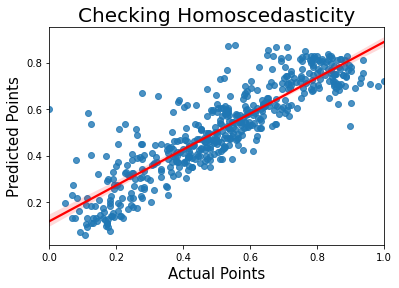

In [103]:
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color": "red"})
plt.title('Checking Homoscedasticity', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

<div class="alert alert-block alert-warning" font-size=3>
<b>Observation:</b> <br>Errors are with Homoscedasticity</div>

#### Assumption Error Terms Being Independent 

###### Evaluating Correlation Co-efficients of Predictors Impacting Target Variable (Individually)

Importing library for calculating Pearson Value

In [104]:
from scipy.stats import pearsonr

In [105]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> -3.2075037070811163e-15


In [106]:
if 'const' in X_train_model.columns:
    X_train_model.drop('const',axis=1,inplace=True)
    
corr_dict = {index: round(pearsonr(y_train, X_train_model[index])[0], 4) for index in X_train_model.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
temp,0.6435
yr,0.5915
spring,-0.5489
windspeed,-0.2538
Mist_Cloudy,-0.1755


<div class="alert alert-block alert-warning" font-size=3>
<b>Observation:</b> <br> Error Terms are independent </div>

# 5. Prediction

##### MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model <font color=blue>(Model 5)</font>
<pre>
Apply scaler() to all numeric variables in test dataset. 

Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data. 

In other words, we want to prevent the information leak from train to test dataset.

In [107]:
# Checking column of test data
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues',
       'Wed', 'Mist_Cloudy', 'Partly_Cloudy'],
      dtype='object')

'temp','atemp','hum','windspeed','cnt' -- Are Numerical columns

In [108]:
# Getting the names of numerical columns
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Processing MinMaxScaling for test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [109]:
# Check the values of df_test
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [110]:
# Check statistical values for df_test
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Mist_Cloudy,Partly_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.319635,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.467403,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Feature subset selection for test data

In [111]:
# Capturing y_test value
y_test = df_test.pop('cnt')

# Capturing X_test values
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   hum            219 non-null    float64
 5   windspeed      219 non-null    float64
 6   spring         219 non-null    uint8  
 7   summer         219 non-null    uint8  
 8   winter         219 non-null    uint8  
 9   Aug            219 non-null    uint8  
 10  Dec            219 non-null    uint8  
 11  Feb            219 non-null    uint8  
 12  Jan            219 non-null    uint8  
 13  Jul            219 non-null    uint8  
 14  Jun            219 non-null    uint8  
 15  Mar            219 non-null    uint8  
 16  May            219 non-null    uint8  
 17  Nov            219 non-null    uint8  
 18  Oct      

In [112]:
# Checking the columns of X_train_model
X_train_model.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'Mist_Cloudy'], dtype='object')

In [113]:
#Selecting the variables that were part of final model.
col1=X_train_model.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_train_model = sm.add_constant(X_test)

X_train_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        219 non-null    float64
 1   yr           219 non-null    int64  
 2   temp         219 non-null    float64
 3   windspeed    219 non-null    float64
 4   spring       219 non-null    uint8  
 5   Mist_Cloudy  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 9.0 KB


In [114]:
# Making predictions using the final model 
y_pred = lrm_model_final.predict(X_train_model)

#  6. Evalution on the test-set

Displaying values for y_test & y_pred

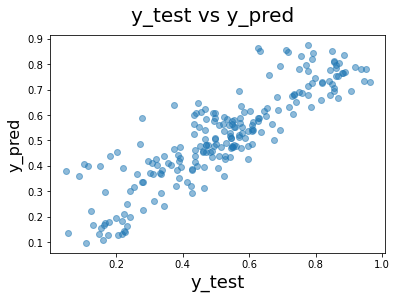

In [115]:
# Plotting y_test and y_pred to understand the spread
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16);

Check for linear regression model fit.

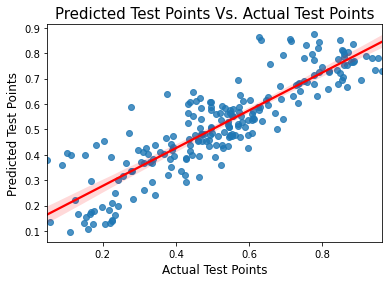

In [116]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 12})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 12})
plt.show()

<div class="alert alert-block alert-warning" font-size=3>
<b>Observation:</b> <br>Actual test data vs Predicted test data forms a linear regression model fit </div>

# 7. Model Evaluation Observation

### R^2 Value for TEST

In [117]:
# We already have the value of R^2 (calculated in above step)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
round(r2,4)

0.7666

#### Adjusted R^2 Value for TEST
<font size=4>$$R^2_{adj} = 1-(1-R^2)\ast\frac{n-1}{n-p-1}$$</font>

In [118]:
# Get the shape of X_test
X_test.shape

(219, 5)

In [119]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
round(adjusted_r2,3)

0.761

**From the coefficients that we get for the variables, our `linear regression equation` becomes:**

**Count** =  0.2990 + 0.2416 X *`yr`* + 0.3827 X *`temp`* - 0.1804 X *`windspeed`* - 0.1410 X *`spring`* - 0.0628 X *`Mist_Cloudy`*